ICC Cricket World Cup 2023 – Complete Data Analysis **Project**

CELL 1: Import Required Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

CELL 2: Load All 4 CSV Files

In [3]:
batting_df = pd.read_csv("batting_summary.csv")
bowling_df = pd.read_csv("bowling_summary.csv")
match_df = pd.read_csv("match_schedule_results.csv")
players_df = pd.read_csv("world_cup_players_info.csv")

CELL 3: Data Overview

In [6]:
batting_df.head()

bowling_df.head()

match_df.head()

players_df.head()

,player_name,team_name,image_of_player,battingStyle,bowlingStyle,playingRole,description
0,Jonny Bairstow,England,,Right-hand bat,Right-arm fast-medium,Wicketkeeper Batter,Jonny Bairstow is an English cricketer known f...
1,Joe Root,England,,Right hand Bat,Right arm Offbreak,Top order Batter,Joe Root is an English cricketer known for his...
2,Jos Buttler,England,,Right hand Bat,,Wicketkeeper Batter,Jos Buttler is an English cricketer known for ...
3,Will Young,New Zealand,,Right hand Bat,Right arm Offbreak,Top order Batter,Will Young is a New Zealand cricketer known fo...
4,Rachin Ravindra,New Zealand,,Left hand Bat,Slow Left arm Orthodox,Top order Batter,Rachin Ravindra is a New Zealand cricketer kno...


CELL 4: Basic Data Cleaning

In [7]:
batting_df.dropna(how="all", inplace=True)
bowling_df.dropna(how="all", inplace=True)
match_df.dropna(how="all", inplace=True)
players_df.dropna(how="all", inplace=True)

In [14]:
print(batting_df.columns)
print(match_df.columns)
print(players_df.columns)
print(bowling_df.columns)


Index(['Match_no', 'Match_Between', 'Team_Innings', 'Batsman_Name',
       'Batting_Position', 'Dismissal', 'Runs', 'Balls', '4s', '6s',
       'Strike_Rate'],
      dtype='object')
Index(['Match_no', 'Date', 'Venue', 'Team1', 'Team2', 'Winner',
       'Scorecard URL'],
      dtype='object')
Index(['player_name', 'team_name', 'image_of_player', 'battingStyle',
       'bowlingStyle', 'playingRole', 'description'],
      dtype='object')
Index(['Match_no', 'Match_Between', 'Bowling_Team', 'Bowler_Name', 'Overs',
       'Maidens', 'Runs', 'Wickets', 'Economy'],
      dtype='object')


CELL 5: Merge Batting + Match Data

In [10]:
bat_match_df = pd.merge(
    batting_df,
    match_df,
    on="Match_no",
    how="left"
)

 CELL 6: Merge Bowling + Match Data


In [11]:
bowl_match_df = pd.merge(
    bowling_df,
    match_df,
    on="Match_no",
    how="left"
)

CELL 7: Merge Player Information


In [16]:
bat_full_df = pd.merge(
    bat_match_df,
    players_df,
    left_on="Batsman_Name",
    right_on="player_name",
    how="left"
)


In [17]:
bowl_full_df = pd.merge(
    bowl_match_df,
    players_df,
    left_on="Bowler_Name",
    right_on="player_name",
    how="left"
)


All 4 datasets are now connected



VISUALIZATION SECTION

CELL 8: Matches Won by Each Team

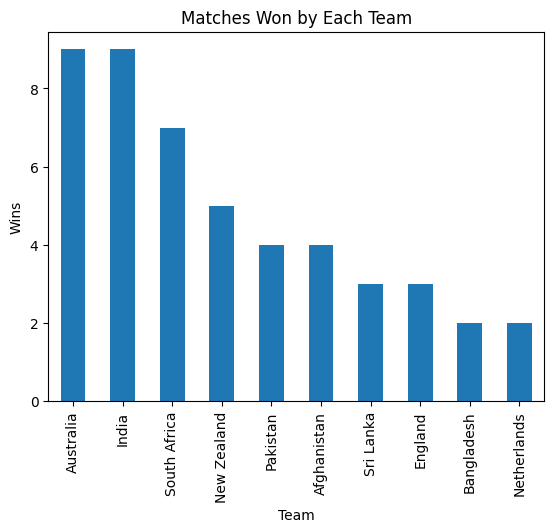

In [18]:
team_wins = match_df['Winner'].value_counts()

plt.figure()
team_wins.plot(kind='bar')
plt.title("Matches Won by Each Team")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.show()

CELL 9: Top 10 Run Scorers


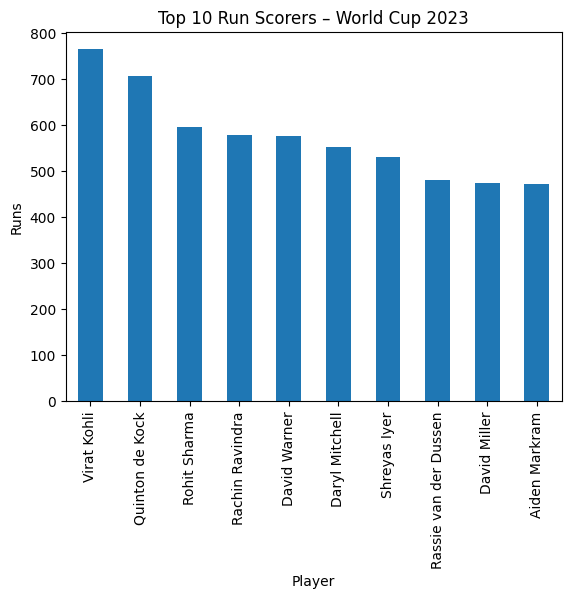

In [20]:
top_runs = (
    bat_full_df.groupby('player_name')['Runs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_runs.plot(kind='bar')
plt.title("Top 10 Run Scorers – World Cup 2023")
plt.xlabel("Player")
plt.ylabel("Runs")
plt.show()

CELL 10: Average Runs - Winning vs Losing Cause



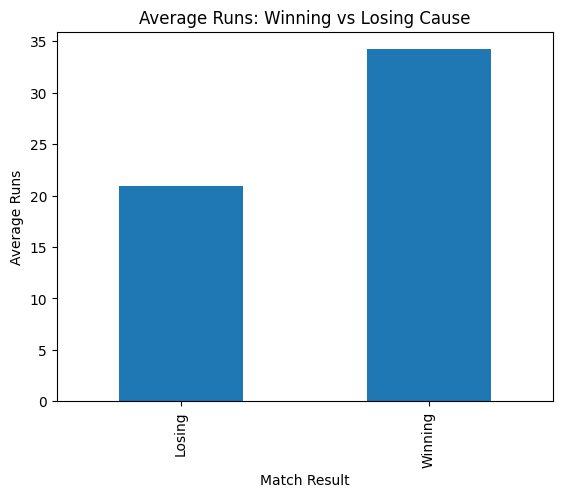

In [22]:
bat_full_df["Result"] = bat_full_df.apply(
    lambda x: "Winning" if x["Team_Innings"] == x["Winner"] else "Losing",
    axis=1
)

runs_result = bat_full_df.groupby("Result")["Runs"].mean()

plt.figure()
runs_result.plot(kind="bar")
plt.title("Average Runs: Winning vs Losing Cause")
plt.xlabel("Match Result")
plt.ylabel("Average Runs")
plt.show()

CELL 11: Top 10 Wicket Takers


In [23]:
top_wickets = (
    bowl_full_df.groupby('player_name')['Wickets']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)


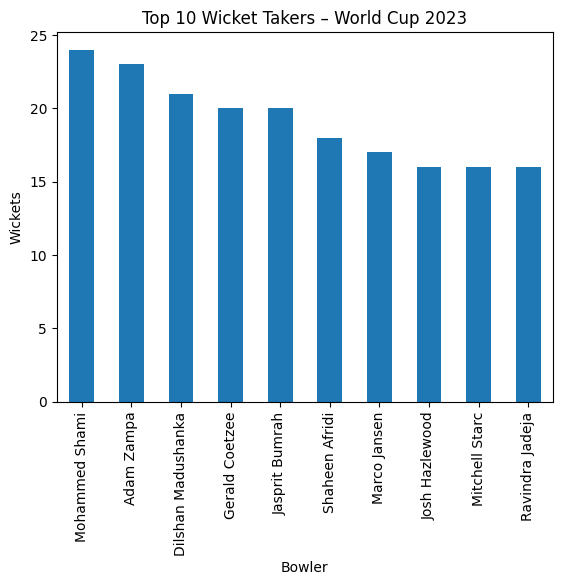

In [24]:
plt.figure()
top_wickets.plot(kind='bar')
plt.title("Top 10 Wicket Takers – World Cup 2023")
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.show()

CELL 12: Average Wickets – Wins vs Losses

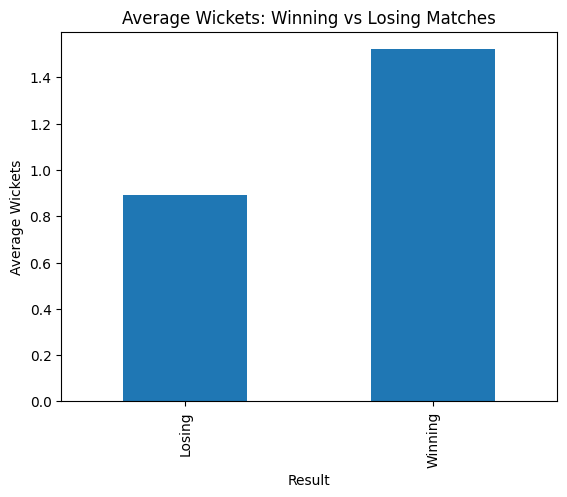

In [26]:
bowl_full_df["Result"] = bowl_full_df.apply(
    lambda x: "Winning" if x["Bowling_Team"] == x["Winner"] else "Losing",
    axis=1
)

wickets_result = bowl_full_df.groupby('Result')['Wickets'].mean()

plt.figure()
wickets_result.plot(kind='bar')
plt.title("Average Wickets: Winning vs Losing Matches")
plt.ylabel("Average Wickets")
plt.show()

CELL 13: Batting Friendly Venues


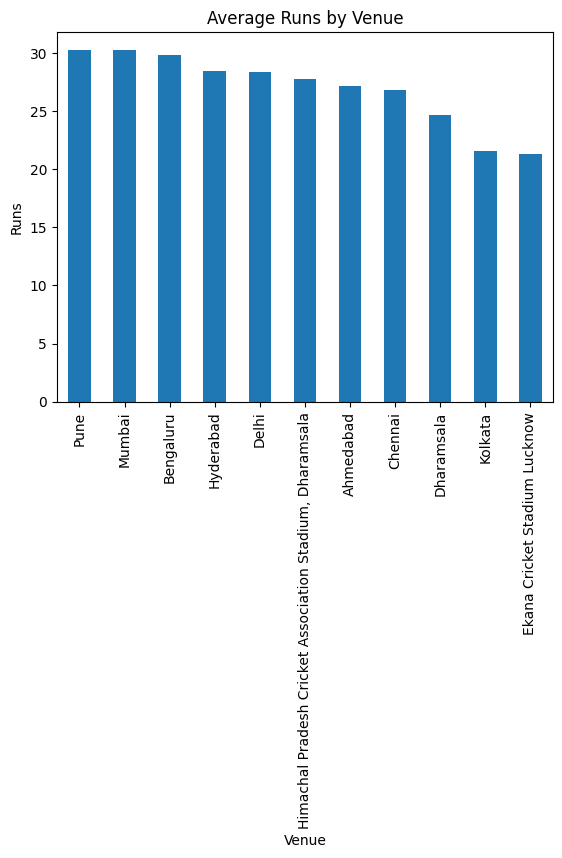

In [27]:
venue_runs = (
    bat_full_df.groupby('Venue')['Runs']
    .mean()
    .sort_values(ascending=False)
)

plt.figure()
venue_runs.plot(kind='bar')
plt.title("Average Runs by Venue")
plt.xlabel("Venue")
plt.ylabel("Runs")
plt.show()

CELL 14: Best All-Round Impact Players

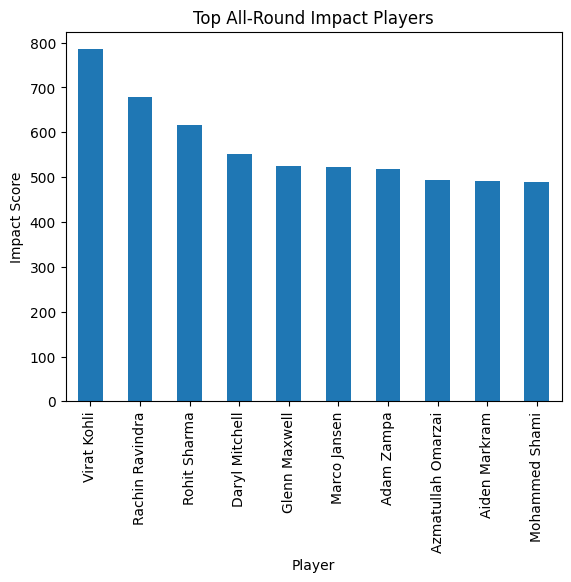

In [28]:
bat_runs = bat_full_df.groupby('player_name')['Runs'].sum()
bowl_wkts = bowl_full_df.groupby('player_name')['Wickets'].sum()

impact_score = (bat_runs + bowl_wkts * 20).sort_values(ascending=False).head(10)

plt.figure()
impact_score.plot(kind='bar')
plt.title("Top All-Round Impact Players")
plt.xlabel("Player")
plt.ylabel("Impact Score")
plt.show()

CELL 15: Team Performance – Chasing vs Defending


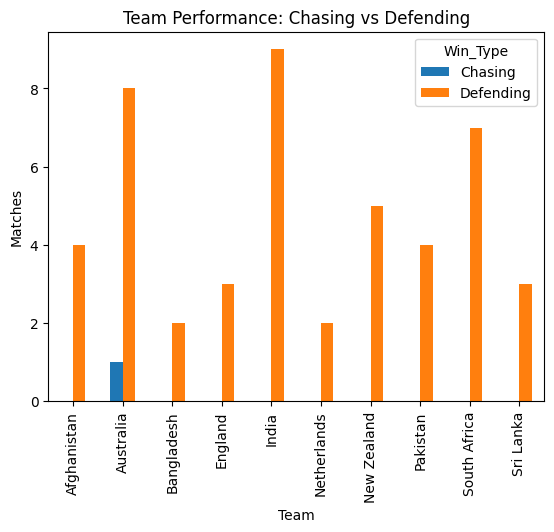

In [30]:
match_df["Win_Type"] = match_df.apply(
    lambda x: "Chasing" if x["Winner"] == x["Team2"] else "Defending",
    axis=1
)

team_strategy = match_df.groupby(['Winner', 'Win_Type']).size().unstack()

team_strategy.plot(kind='bar')
plt.title("Team Performance: Chasing vs Defending")
plt.xlabel("Team")
plt.ylabel("Matches")
plt.show()

TEAM PERFORMANCE: GOOD vs POOR TEAMS

CELL 16: Overall Team Performance Table



In [32]:
team_wins = match_df["Winner"].value_counts()

team_runs = bat_full_df.groupby("Team_Innings")["Runs"].sum()

team_wickets = bowl_full_df.groupby("Bowling_Team")["Wickets"].sum()

team_performance = pd.DataFrame({
    "Wins": team_wins,
    "Total Runs": team_runs,
    "Total Wickets": team_wickets
}).fillna(0)

team_performance


,Wins,Total Runs,Total Wickets
Afghanistan,4,1990,53
Australia,9,3303,86
Bangladesh,2,1944,51
England,3,2135,65
India,9,3038,99
Netherlands,2,1728,62
New Zealand,5,2712,71
Pakistan,4,2220,65
South Africa,7,3272,88
Sri Lanka,3,1942,50


CELL 17: Overall Team Performance Comparison


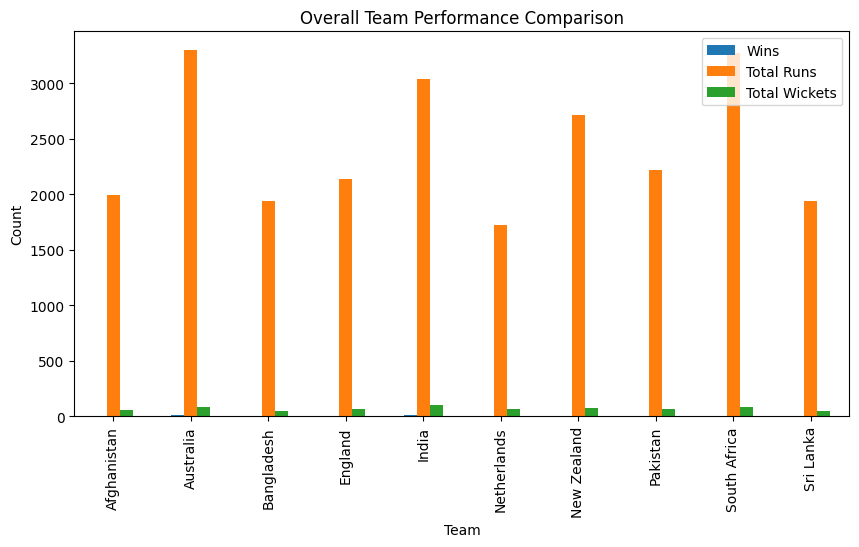

In [33]:
team_performance.plot(kind='bar', figsize=(10,5))
plt.title("Overall Team Performance Comparison")
plt.ylabel("Count")
plt.xlabel("Team")
plt.show()

CELL 18: Best Performing Teams (Top 5)


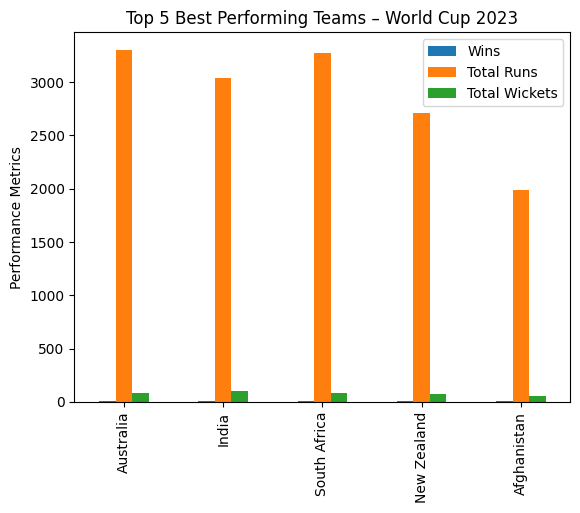

In [34]:
best_teams = team_performance.sort_values(by='Wins', ascending=False).head(5)

best_teams.plot(kind='bar')
plt.title("Top 5 Best Performing Teams – World Cup 2023")
plt.ylabel("Performance Metrics")
plt.show()

CELL 19: Poor Performing Teams (Bottom 5)


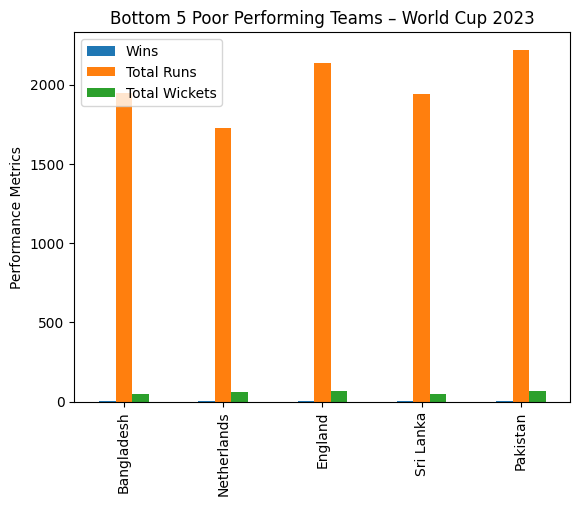

In [35]:
poor_teams = team_performance.sort_values(by='Wins').head(5)

poor_teams.plot(kind='bar')
plt.title("Bottom 5 Poor Performing Teams – World Cup 2023")
plt.ylabel("Performance Metrics")
plt.show()

CELL 20: Batting vs Bowling Strength by Team



In [37]:
team_strength = pd.DataFrame({
    "Average Runs per Match": bat_full_df.groupby("Team_Innings")["Runs"].mean(),
    "Average Wickets per Match": bowl_full_df.groupby("Bowling_Team")["Wickets"].mean()
}).fillna(0)

team_strength

,Average Runs per Match,Average Wickets per Match
Afghanistan,26.533333,0.963636
Australia,27.525000,1.246377
Bangladesh,21.600000,0.980769
England,21.565657,1.226415
India,39.454545,1.546875
Netherlands,17.632653,1.068966
New Zealand,32.285714,1.126984
Pakistan,28.831169,1.250000
South Africa,30.018349,1.629630
Sri Lanka,22.321839,0.925926


## **FINAL PROJECT CONCLUSION**



Conclusion:

This project analyzed the ICC Cricket World Cup 2023 using batting, bowling,
match results, and player information. Teams that performed well showed a strong
balance between consistent batting and effective wicket-taking bowling units.
Poor performing teams struggled due to lack of consistency, weak batting depth,
or ineffective bowling. Overall, team success depended on balanced all-round
performance rather than strength in only one department.
